 **SUBMISSION PERTAMA KELAS BELAJAR PENGEMBANGAN MACHINE LEARNING**

 Nama : Candra Wali Sanjaya
>
 Perguruan Tinggi : Universitas Nasional Pasim


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
df = pd.read_csv('Emotion_final.csv')
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
# Convert emotion categories to one-hot encoding
category = pd.get_dummies(df.Emotion)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Emotion')
new_df


,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,0,1,0,0,0,0
21455,Successive state elections have seen the gover...,0,1,0,0,0,0
21456,Vincent was irritated but not dismay,0,1,0,0,0,0
21457,Kendall-Hume turned back to face the dismayed ...,0,1,0,0,0,0


In [4]:
# Extract texts and labels
texts = new_df['Text'].values
labels = new_df[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']].values

In [5]:
# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2)


In [6]:
# Tokenize the texts
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(train_texts)
tokenizer.fit_on_texts(test_texts)
print(tokenizer.word_index)


{'x': 1785, 'i': 2, 'feel': 3, 'and': 4, 'to': 5, 'the': 6, 'a': 7, 'of': 8, 'that': 9, 'feeling': 10, 'my': 11, 'in': 12, 'it': 13, 'like': 14, 'was': 15, 'so': 16, 'for': 17, 'im': 18, 'but': 19, 'me': 20, 'have': 21, 'is': 22, 'with': 23, 'this': 24, 'am': 25, 'not': 26, 'about': 27, 'be': 28, 'as': 29, 'on': 30, 'you': 31, 'at': 32, 'just': 33, 'when': 34, 'or': 35, 'all': 36, 'more': 37, 'because': 38, 'do': 39, 'can': 40, 'up': 41, 'he': 42, 'really': 43, 'by': 44, 't': 45, 'are': 46, 'very': 47, 'been': 48, 'if': 49, 'know': 50, 'had': 51, 'out': 52, 'her': 53, 'time': 54, 'what': 55, 'myself': 56, 'how': 57, 'from': 58, 'they': 59, 'little': 60, 'get': 61, 'now': 62, 'will': 63, 'being': 64, 'people': 65, 'would': 66, 'them': 67, 'she': 68, 'want': 69, 'some': 70, 'one': 71, 'an': 72, 'his': 73, 'him': 74, 'who': 75, 'still': 76, 'even': 77, 'think': 78, 'there': 79, 'ive': 80, 'life': 81, 'we': 82, 'its': 83, 'make': 84, 'bit': 85, 'something': 86, 'much': 87, 'could': 88, 'lo

In [7]:
# Convert texts to sequences and pad them
sequences_train = tokenizer.texts_to_sequences(train_texts)
sequences_test = tokenizer.texts_to_sequences(test_texts)


In [8]:
# Specify a fixed sequence length
max_sequence_length = 66
padded_train = pad_sequences(sequences_train, maxlen=max_sequence_length)
padded_test = pad_sequences(sequences_test, maxlen=max_sequence_length)

In [9]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16, input_length=max_sequence_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 16)            80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 117702 (459.77 KB)
Trainable params: 117702 (459.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Define a callback for early stopping
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.9:
            print("\nAkurasi telah mencapai >90%!")
            self.model.stop_training = True

callbacks = myCallback()

In [11]:
# Train the model
hist = model.fit(
    padded_train, train_labels,
    validation_data=(padded_test, test_labels),
    epochs=50,
    batch_size=128,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/50
135/135 - 25s - loss: 1.5692 - accuracy: 0.3255 - val_loss: 1.4035 - val_accuracy: 0.3558 - 25s/epoch - 184ms/step
Epoch 2/50
135/135 - 6s - loss: 1.1628 - accuracy: 0.4368 - val_loss: 1.1391 - val_accuracy: 0.4429 - 6s/epoch - 48ms/step
Epoch 3/50
135/135 - 3s - loss: 0.9711 - accuracy: 0.5551 - val_loss: 1.0421 - val_accuracy: 0.5958 - 3s/epoch - 21ms/step
Epoch 4/50
135/135 - 2s - loss: 0.6836 - accuracy: 0.7476 - val_loss: 0.8871 - val_accuracy: 0.7190 - 2s/epoch - 18ms/step
Epoch 5/50
135/135 - 2s - loss: 0.3926 - accuracy: 0.8726 - val_loss: 0.5773 - val_accuracy: 0.8041 - 2s/epoch - 15ms/step
Epoch 6/50

Akurasi telah mencapai >90%!
135/135 - 3s - loss: 0.2658 - accuracy: 0.9112 - val_loss: 0.5326 - val_accuracy: 0.8318 - 3s/epoch - 20ms/step


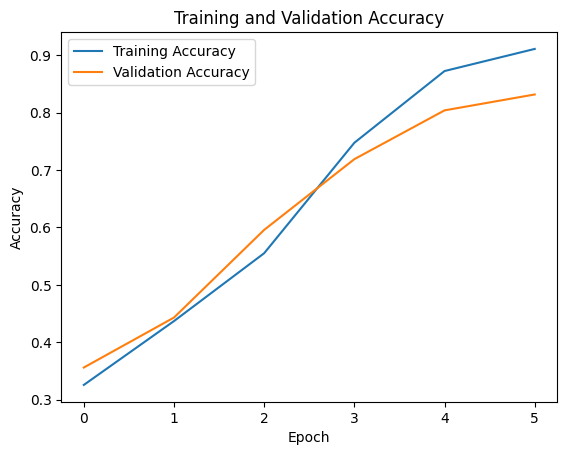

In [12]:
# Plot the model accuracy
training_accuracy = hist.history['accuracy']
validation_accuracy = hist.history['val_accuracy']
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

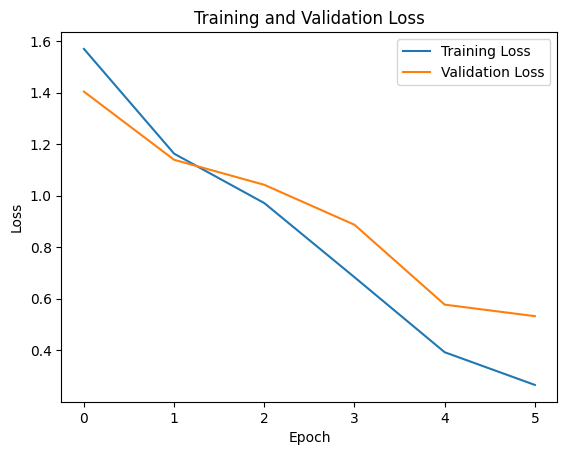

In [13]:
# Plot the model loss
training_loss = hist.history['loss']
validation_loss = hist.history['val_loss']
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()